In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Provide the file path
file_path = '/Users/atanugiri/Downloads/Kinesiolagy-Data-Analysis/Pilot_Datasheet.xlsx'

# Read Excel by sheet index
df = pd.read_excel(file_path, sheet_name=0, header=None)

# Display the first few rows of the DataFrame
# print(df.head())

In [3]:
def modifyDataFrame(input_df):
    # Reset row indices
    input_df = input_df.reset_index(drop=True)
    
    # Reset column indices
    input_df.columns = range(input_df.shape[1])
    
    # Accessing [0, 0] after reindexing to rename
    input_df.at[0, 0] = 'Baseline'
    
    # Remove all columns where column has NaN
    input_df = input_df.loc[[0] + list(range(2,7)), input_df.iloc[0].notna()]

    # Reset row and column indices
    input_df = input_df.reset_index(drop=True)
    input_df.columns = range(input_df.shape[1])
    
    return input_df

In [4]:
# Extract data and visualize
lactateFed = df.iloc[3:10, 21:36]
lactateFed = modifyDataFrame(lactateFed) # Apply the function

# Lactate Fasted
lactateFasted = df.iloc[3:10, 75:93]
lactateFasted = modifyDataFrame(lactateFasted)

# Glucose Fed
glucoseFed = df.iloc[3:10, 37:52]
glucoseFed = modifyDataFrame(glucoseFed)

# Glucose Fasted
glucoseFasted = df.iloc[3:10, 94:112]
glucoseFasted = modifyDataFrame(glucoseFasted)

print(f"Lactate Fed Data:\n{lactateFed}\n")
print(f"Lactate Fasted Data:\n{lactateFasted}\n")
print(f"Glucose Fed Data:\n{glucoseFed}\n")
print(f"Glucose Fasted Data:\n{glucoseFasted}\n")

Lactate Fed Data:
          0       1        2        3        4         5         6         7
0  Baseline  15MINS  30 MINS  60 MINS  90 MINS  120 MINS  150 MINS  180 MINS
1       2.7     2.8      3.9     3.95      2.8       2.5      3.65       2.8
2       1.7     2.2     2.25      1.6      1.4       0.9       1.1       0.9
3       1.7     2.5     3.15      2.7      1.4      1.45      1.55       1.3
4         2       2        4      1.5      2.5      1.85       1.7       1.5
5      2.55     2.7      3.3     1.95     1.55       1.7       1.5       1.2

Lactate Fasted Data:
          0        1        2        3        4         5         6         7
0  Baseline  15 MINS  30 MINS  60 MINS  90 MINS  120 MINS  150 MINS  180 MINS
1         3     3.15      3.1     4.15     5.45      2.35      1.65       1.6
2       1.5      2.1     2.45      1.7     1.45       0.9         1      0.75
3      1.65     1.75     2.75     2.25     1.95       1.6      1.55       1.4
4      2.55      1.4     2.15  

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plotData(group1, group2, group1_label="Group 1", group2_label="Group 2", 
             xlabel="Time (MINS)", ylabel="Measurement (Mean ± SD)", 
             title="Measurement Over Time with AUC", save_path=None):
    """
    Plot mean with error bars and compute AUC for two groups.

    Args:
        group1 (DataFrame): DataFrame for the first group (rows: samples, columns: time points).
        group2 (DataFrame): DataFrame for the second group (rows: samples, columns: time points).
        group1_label (str): Label for the first group.
        group2_label (str): Label for the second group
        xlabel (str): Label for the X-axis.
        ylabel (str): Label for the Y-axis.
        title (str): Title of the plot.
        save_path (str, optional): File path to save the plot. Defaults to None.
    Returns:
        dict: AUC values and their difference as a dictionary.
    """
    plt.figure(figsize=(10, 6))
    
    # Extract time points from the first row (X-axis labels)
    time_points = group1.iloc[0, :]
    time_points = time_points.replace("Baseline", "0")  # Replace 'Baseline' with '0'
    time_points = time_points.str.extract(r'(\d+)').astype(float).squeeze()  # Extract numeric parts and convert to float

    # Calculate means and standard deviations for both datasets
    group1_mean = group1.iloc[1:, :].astype(float).mean(axis=0)
    group1_std = group1.iloc[1:, :].astype(float).std(axis=0)

    group2_mean = group2.iloc[1:, :].astype(float).mean(axis=0)
    group2_std = group2.iloc[1:, :].astype(float).std(axis=0)

    # Plot data with error bars and AUC
    plt.errorbar(time_points, group1_mean, yerr=group1_std, fmt='-o', capsize=5, label=group1_label)
    plt.fill_between(time_points, group1_mean, alpha=0.2, label=f"AUC {group1_label}")  # AUC shading

    plt.errorbar(time_points, group2_mean, yerr=group2_std, fmt='-o', capsize=5, label=group2_label)
    plt.fill_between(time_points, group2_mean, alpha=0.2, label=f"AUC {group2_label}")  # AUC shading

    # Add labels and title
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16)
    
    # Customize tick labels
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()

    # Save plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', format='png')

    # Show plot
    plt.show()
    
    # Compute AUC using the trapezoidal rule
    auc_group1 = np.trapz(group1_mean, time_points)
    auc_group2 = np.trapz(group2_mean, time_points)
                                 
    # Calculate the difference
    auc_difference = auc_group1 - auc_group2

    fig = plt.gcf()
    
    return fig, {"AUC_Group1": auc_group1, "AUC_Group2": auc_group2, "AUC_Difference": auc_difference}


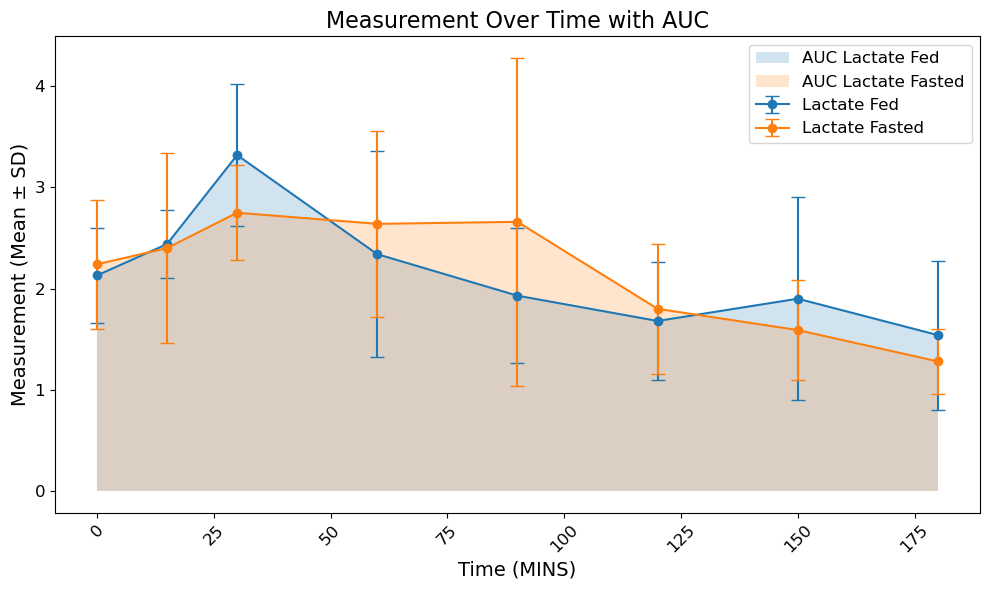

{'AUC_Group1': 385.875, 'AUC_Group2': 394.5750000000001, 'AUC_Difference': -8.700000000000102}


<Figure size 640x480 with 0 Axes>

In [6]:
fig, auc_values = plotData(lactateFed, lactateFasted, group1_label="Lactate Fed", group2_label="Lactate Fasted", 
                      save_path="lactate_levels_auc.png")
print(auc_values)

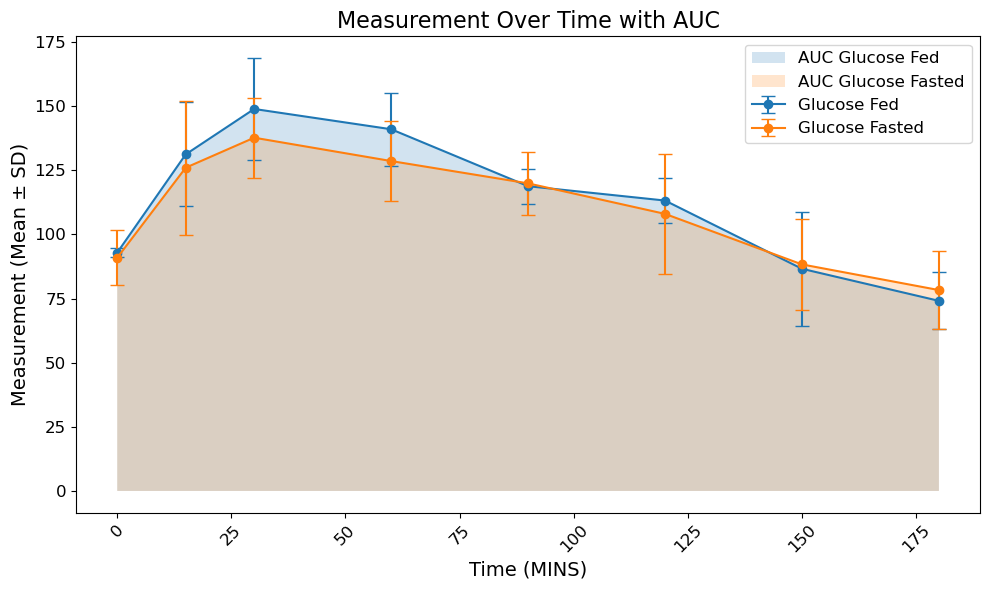

{'AUC_Group1': 20914.5, 'AUC_Group2': 20188.5, 'AUC_Difference': 726.0}


<Figure size 640x480 with 0 Axes>

In [7]:
fig, auc_values = plotData(glucoseFed, glucoseFasted, group1_label="Glucose Fed", group2_label="Glucose Fasted", 
                      save_path="glucose_levels_auc.png")
print(auc_values)